## Moving Averages

* Moving Average forms a baseline model for timeseries analysis.
* It is also used in other machine learning models. Some scenarios are when you want to predict next customer visit or in behavior model if you want to analyze the customer history to see the next best action. We can use moving average function as features in machine learning.

### The core assumption behind Moving Averages is that the time series is stationary and it has a very slow varying mean or constant mean.

### If the data has a lot of fluctuations or if the data is not stationary or if the mean is varying a lot then Moving Averages is not the right method to Forecast such data.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
import seaborn as sns

from download import download

plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["axes.grid"] = False

# code formatter
%load_ext nb_black

<IPython.core.display.Javascript object>

## Exploring NON STATIONARY data first

### Reading the dataset and Combining year, month, day 

In [2]:
def parse(x):
    return datetime.strptime(x, "%m/%d/%Y")

<IPython.core.display.Javascript object>

In [3]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/electricity_consumption.csv",
    parse_dates=["Bill_Date"],
    date_parser=parse,
)

<IPython.core.display.Javascript object>

In [4]:
df.head()

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,2016-01-01,365,1423.5,219.0,247.73,31
1,2016-02-01,292,1138.8,175.2,234.11,31
2,2016-03-01,130,507.0,78.0,123.85,29
3,2016-04-01,117,456.3,70.2,111.22,29
4,2016-05-01,136,530.4,81.6,118.37,29


<IPython.core.display.Javascript object>

In [5]:
print("Rows: ", df.shape[0])
print("Cols: ", df.shape[1])
print("\nFeatures: ", df.columns.tolist())
print("\nMissing Values: ", df.isnull().any())
print("\nUnique Values: ", df.nunique())

Rows:  53
Cols:  6

Features:  ['Bill_Date', 'On_peak', 'Off_peak', 'Usage_charge', 'Billed_amount', 'Billing_days']

Missing Values:  Bill_Date        False
On_peak          False
Off_peak         False
Usage_charge     False
Billed_amount    False
Billing_days     False
dtype: bool

Unique Values:  Bill_Date        53
On_peak          51
Off_peak         53
Usage_charge     53
Billed_amount    52
Billing_days      9
dtype: int64


<IPython.core.display.Javascript object>

In [6]:
# by setting date as index we will be able to do a partial search on rows using just the year, whereas if we keep it as
# a column then we will need to give the exact value to search and extract data
df = df.set_index("Bill_Date")

<IPython.core.display.Javascript object>

In [7]:
df.head()

,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
Bill_Date,,,,,
2016-01-01,365,1423.5,219.0,247.73,31
2016-02-01,292,1138.8,175.2,234.11,31
2016-03-01,130,507.0,78.0,123.85,29
2016-04-01,117,456.3,70.2,111.22,29
2016-05-01,136,530.4,81.6,118.37,29


<IPython.core.display.Javascript object>

In [8]:
# extracting 2 years of data and assigning it to a new dataframe
bill_2018 = df["2016":"2018"][["Billed_amount"]]

<IPython.core.display.Javascript object>

In [9]:
bill_2018

,Billed_amount
Bill_Date,
2016-01-01,247.73
2016-02-01,234.11
2016-03-01,123.85
2016-04-01,111.22
2016-05-01,118.37
2016-06-01,77.81
2016-07-01,86.67
2016-08-01,122.40
2016-09-01,223.62


<IPython.core.display.Javascript object>

In [10]:
bill_2018.count()

Billed_amount    36
dtype: int64

<IPython.core.display.Javascript object>

## SIMPLE MOVING AVERAGE

(t + (t-1) + (t-2) + .... + (t-n)) / n

### Here, we specify the value of n (could be last 2 or last 3 data points etc.)

### Pandas ROLLING function provides simple moving average.

### Simple Moving Average gives us the Baseline model which will not work for this non stationary data but it is always a good idea to start with the baseline model.

In [11]:
# below rolling average function is taking average of current value and previous 2 values

bill_2018["Billed_amount"].rolling(window=3).mean()

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    201.896667
2016-04-01    156.393333
2016-05-01    117.813333
2016-06-01    102.466667
2016-07-01     94.283333
2016-08-01     95.626667
2016-09-01    144.230000
2016-10-01    166.186667
2016-11-01    175.566667
2016-12-01    182.483333
2017-01-01    219.516667
2017-02-01    240.776667
2017-03-01    209.833333
2017-04-01    161.550000
2017-05-01    141.170000
2017-06-01    161.350000
2017-07-01    215.483333
2017-08-01    243.746667
2017-09-01    267.820000
2017-10-01    231.653333
2017-11-01    189.500000
2017-12-01    145.206667
2018-01-01    176.750000
2018-02-01    206.696667
2018-03-01    223.860000
2018-04-01    185.040000
2018-05-01    172.280000
2018-06-01    177.896667
2018-07-01    222.270000
2018-08-01    264.630000
2018-09-01    277.363333
2018-10-01    291.766667
2018-11-01    259.546667
2018-12-01    224.340000
Name: Billed_amount, dtype: float64

<IPython.core.display.Javascript object>

In [12]:
# below rolling average function is taking average of current value and previous 2 values but there is a shift of 1.
# shift of 1 means April will be assigned Mar, Feb and Jan's average. Below first 3 cols are Null because we have used
# shift of 1

bill_2018["ma_rolling_3"] = bill_2018["Billed_amount"].rolling(window=3).mean().shift(1)

<IPython.core.display.Javascript object>

### Below we can see that Moving Average didn't work well as compared to the original Billed_amount. 

Example - For "2018-10-01", the original billed_amount is high but the moving average didn't detect that surge.

In [13]:
bill_2018

,Billed_amount,ma_rolling_3
Bill_Date,,
2016-01-01,247.73,NaN
2016-02-01,234.11,NaN
2016-03-01,123.85,NaN
2016-04-01,111.22,201.896667
2016-05-01,118.37,156.393333
2016-06-01,77.81,117.813333
2016-07-01,86.67,102.466667
2016-08-01,122.40,94.283333
2016-09-01,223.62,95.626667


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Bill_Date'>

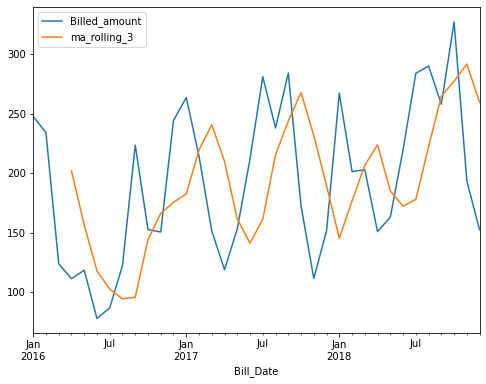

<IPython.core.display.Javascript object>

In [14]:
# below we can see that the moving average values were able to catch the seasonality but there is a lag.

bill_2018.plot()

## WEIGHTED MOVING AVERAGE

(t * weighted factor) + ((t-1) * weighted factor-1) + ..... + ((t-n) * weighted factor-n) / n 

### Here, we specify the value of n (could be last 2 or last 3 data points etc.)

### Note that weighted moving average is more sensitive to the data points. It can identify trends sooner than simple moving average but there is an assigned complexity too to it and that is that we need to assign weights. 

### There is no direct function for weighted moving average in Pandas so we will be creating one. Numpy has a function for it but it is a bit complex.

In [15]:
def wma(weights):
    def calc(x):
        return (weights * x).mean()

    return calc

<IPython.core.display.Javascript object>

In [16]:
bill_2018["Billed_amount"].rolling(window=3).apply(wma(np.array([0.5, 1, 1.5])))

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    181.250000
2016-04-01    135.911667
2016-05-01    116.900000
2016-06-01     96.898333
2016-07-01     89.000000
2016-08-01    103.058333
2016-09-01    167.055000
2016-10-01    171.210000
2016-11-01    163.386667
2016-12-01    197.788333
2017-01-01    238.366667
2017-02-01    235.768333
2017-03-01    191.150000
2017-04-01    145.628333
2017-05-01    141.443333
2017-06-01    176.898333
2017-07-01    236.818333
2017-08-01    248.061667
2017-09-01    268.338333
2017-10-01    220.773333
2017-11-01    160.701667
2017-12-01    141.661667
2018-01-01    202.718333
2018-02-01    215.018333
2018-03-01    213.125000
2018-04-01    176.625000
2018-05-01    165.640000
2018-06-01    189.380000
2018-07-01    242.421667
2018-08-01    276.361667
2018-09-01    273.026667
2018-10-01    297.940000
2018-11-01    248.801667
2018-12-01    195.198333
Name: Billed_amount, dtype: float64

<IPython.core.display.Javascript object>

### Below note that our total sum of weights = window size (3 in this case)

In [17]:
bill_2018["wma_rolling_3"] = (
    bill_2018["Billed_amount"]
    .rolling(window=3)
    .apply(
        wma(np.array([0.5, 1, 1.5]))
    )  # assign higher weightage to the most recent data point and lowest to the last one. It can be other way round too if needed.
    .shift(1)
)

<IPython.core.display.Javascript object>

In [18]:
bill_2018

,Billed_amount,ma_rolling_3,wma_rolling_3
Bill_Date,,,
2016-01-01,247.73,NaN,NaN
2016-02-01,234.11,NaN,NaN
2016-03-01,123.85,NaN,NaN
2016-04-01,111.22,201.896667,181.250000
2016-05-01,118.37,156.393333,135.911667
2016-06-01,77.81,117.813333,116.900000
2016-07-01,86.67,102.466667,96.898333
2016-08-01,122.40,94.283333,89.000000
2016-09-01,223.62,95.626667,103.058333


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Bill_Date'>

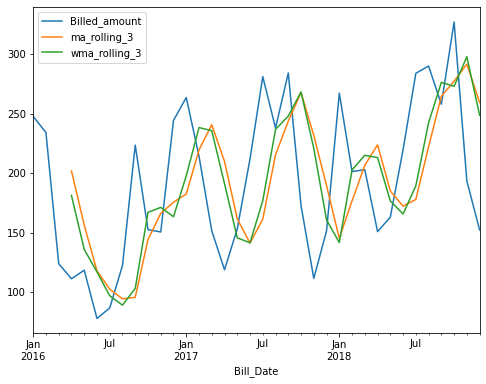

<IPython.core.display.Javascript object>

In [19]:
# below we can see that in this case weighted average too didn't do very well but it is slightly better than
# the simple moving average. The green plot is closer to the blue plot as compared to the orange plot.

bill_2018.plot()

## EXPONENTIAL MOVING AVERAGE

(Close-previous EMA) * (2/(span+1)) + previous EMA 

Here, span is the duration for which we want to calculate the EMA. It is similar to window. It is going to take the previous time period, it is going to calculate the exponential moving average and then take the exponential moving average as the next input rather than the time t-1 and time t-2. 

The EMA is a type of weighted moving average (WMA) that gives more weighting or importance to recent price data.

It is similar to weighted moving average but we don't assign weights here.

* Pandas provide the ema function for calculating exponential moving average.

### The advantage of using this is it adapts better to the changing data points than the simple moving average. And we also don't need to decide the weights needed in case of weighted moving average. It takes care of the weights internally by averaging it out.  

### EMA is able to weight the current events better and that is what we want in the stock market. Latest points are weighted better.

In [20]:
bill_2018["Billed_amount"].ewm(span=3, adjust=False, min_periods=0).mean()

Bill_Date
2016-01-01    247.730000
2016-02-01    240.920000
2016-03-01    182.385000
2016-04-01    146.802500
2016-05-01    132.586250
2016-06-01    105.198125
2016-07-01     95.934063
2016-08-01    109.167031
2016-09-01    166.393516
2016-10-01    159.466758
2016-11-01    155.003379
2016-12-01    199.686689
2017-01-01    231.663345
2017-02-01    222.991672
2017-03-01    187.265836
2017-04-01    153.027918
2017-05-01    153.103959
2017-06-01    182.591980
2017-07-01    231.890990
2017-08-01    234.930495
2017-09-01    259.615247
2017-10-01    216.152624
2017-11-01    163.831312
2017-12-01    157.625656
2018-01-01    212.472828
2018-02-01    206.911414
2018-03-01    204.910707
2018-04-01    177.885353
2018-05-01    170.477677
2018-06-01    195.118838
2018-07-01    239.549419
2018-08-01    264.849710
2018-09-01    261.404855
2018-10-01    294.297427
2018-11-01    243.893714
2018-12-01    198.116857
Name: Billed_amount, dtype: float64

<IPython.core.display.Javascript object>

In [21]:
bill_2018["ewm_window_3"] = (
    bill_2018["Billed_amount"].ewm(span=3, adjust=False, min_periods=0).mean()
)

<IPython.core.display.Javascript object>

In [22]:
bill_2018

,Billed_amount,ma_rolling_3,wma_rolling_3,ewm_window_3
Bill_Date,,,,
2016-01-01,247.73,NaN,NaN,247.730000
2016-02-01,234.11,NaN,NaN,240.920000
2016-03-01,123.85,NaN,NaN,182.385000
2016-04-01,111.22,201.896667,181.250000,146.802500
2016-05-01,118.37,156.393333,135.911667,132.586250
2016-06-01,77.81,117.813333,116.900000,105.198125
2016-07-01,86.67,102.466667,96.898333,95.934063
2016-08-01,122.40,94.283333,89.000000,109.167031
2016-09-01,223.62,95.626667,103.058333,166.393516


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Bill_Date'>

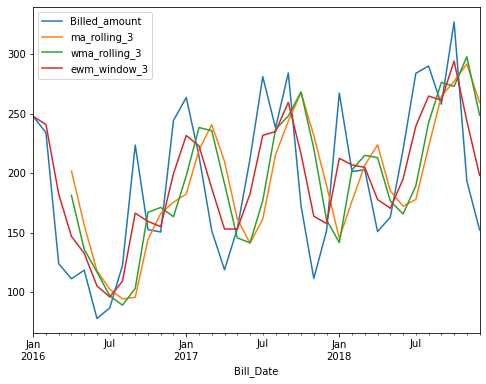

<IPython.core.display.Javascript object>

In [23]:
# below we can see that the red plot is closer to the original blue plot as compared to other 2 plots/lines.

bill_2018.plot()

## EXPONENTIAL SMOOTHING AVERAGE

It requires an additional smoothing parameter called alpha (As compared to EMA above). 

* Check formula in wikipedia
* IMPORTANT - the alpha is between 0 and 1. Larger value of alpha means that the model is paying attention mainly to the recent data points. Smaller values means it is taking history into account. 
* it uses the same pandas function - ewm but instead of span, we will use alpha here.

Here, alpha is the smoothing function or smoothing coefficient/factor. It controls smoothing decay over time. It is the rate at which we influence the observations at the prior time steps and it allows us to decay those values exponentially.  

Exponential smoothing is a rule of thumb technique for smoothing time series data using the exponential window function. Whereas in the simple moving average the past observations are weighted equally, exponential functions are used to assign exponentially decreasing weights over time. It is an easily learned and easily applied procedure for making some determination based on prior assumptions by the user, such as seasonality.

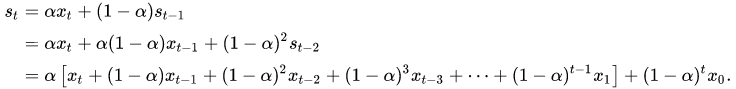# 

In [24]:
bill_2018["Billed_amount"].ewm(alpha=0.7, adjust=False, min_periods=3).mean()

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    158.153800
2016-04-01    125.300140
2016-05-01    120.449042
2016-06-01     90.601713
2016-07-01     87.849514
2016-08-01    112.034854
2016-09-01    190.144456
2016-10-01    163.821337
2016-11-01    154.524401
2016-12-01    217.416320
2017-01-01    249.772896
2017-02-01    224.955869
2017-03-01    173.564761
2017-04-01    135.222428
2017-05-01    147.792728
2017-06-01    192.793819
2017-07-01    254.671146
2017-08-01    242.980344
2017-09-01    271.904103
2017-10-01    202.454231
2017-11-01    138.793269
2017-12-01    147.631981
2018-01-01    231.413594
2018-02-01    210.369078
2018-03-01    205.147723
2018-04-01    167.146317
2018-05-01    164.292895
2018-06-01    203.119869
2018-07-01    259.721961
2018-08-01    281.021588
2018-09-01    264.878476
2018-10-01    308.496543
2018-11-01    227.991963
2018-12-01    175.035589
Name: Billed_amount, dtype: float64

<IPython.core.display.Javascript object>

In [25]:
bill_2018["esm_window_3_7"] = (
    bill_2018["Billed_amount"]
    .ewm(alpha=0.7, adjust=False, min_periods=3)
    .mean()
    .shift(1)
)

<IPython.core.display.Javascript object>

In [26]:
# below we can see that there are points where it has come closer and there are points where it is more far away

bill_2018

,Billed_amount,ma_rolling_3,wma_rolling_3,ewm_window_3,esm_window_3_7
Bill_Date,,,,,
2016-01-01,247.73,NaN,NaN,247.730000,NaN
2016-02-01,234.11,NaN,NaN,240.920000,NaN
2016-03-01,123.85,NaN,NaN,182.385000,NaN
2016-04-01,111.22,201.896667,181.250000,146.802500,158.153800
2016-05-01,118.37,156.393333,135.911667,132.586250,125.300140
2016-06-01,77.81,117.813333,116.900000,105.198125,120.449042
2016-07-01,86.67,102.466667,96.898333,95.934063,90.601713
2016-08-01,122.40,94.283333,89.000000,109.167031,87.849514
2016-09-01,223.62,95.626667,103.058333,166.393516,112.034854


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Bill_Date'>

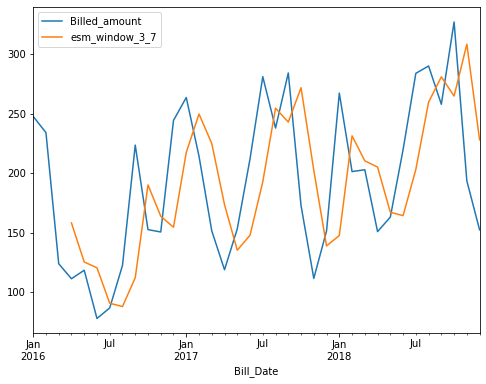

<IPython.core.display.Javascript object>

In [27]:
# we can see that smoothing exponential average is able to capture the trend of the original data (blue line), it has captured
# the ups and downs well but there is still some error, some lag.

bill_2018[["Billed_amount", "esm_window_3_7"]].plot()

In [28]:
# trying a smaller alpha value

bill_2018["Billed_amount"].ewm(alpha=0.3, adjust=False, min_periods=3).mean()

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    207.705800
2016-04-01    178.760060
2016-05-01    160.643042
2016-06-01    135.793129
2016-07-01    121.056191
2016-08-01    121.459333
2016-09-01    152.107533
2016-10-01    152.237273
2016-11-01    151.728091
2016-12-01    179.520664
2017-01-01    204.756465
2017-02-01    207.625525
2017-03-01    190.799868
2017-04-01    169.196907
2017-05-01    164.391835
2017-06-01    178.698285
2017-07-01    209.445799
2017-08-01    218.003059
2017-09-01    237.892142
2017-10-01    218.331499
2017-11-01    186.285049
2017-12-01    175.825535
2018-01-01    203.273874
2018-02-01    202.696712
2018-03-01    202.760698
2018-04-01    187.190489
2018-05-01    179.954342
2018-06-01    191.896040
2018-07-01    219.521228
2018-08-01    240.709859
2018-09-01    245.884902
2018-10-01    270.276431
2018-11-01    247.240502
2018-12-01    218.770351
Name: Billed_amount, dtype: float64

<IPython.core.display.Javascript object>

In [29]:
bill_2018["esm_window_3_3"] = (
    bill_2018["Billed_amount"]
    .ewm(alpha=0.3, adjust=False, min_periods=3)
    .mean()
    .shift(1)
)

<IPython.core.display.Javascript object>

In [30]:
bill_2018

,Billed_amount,ma_rolling_3,wma_rolling_3,ewm_window_3,esm_window_3_7,esm_window_3_3
Bill_Date,,,,,,
2016-01-01,247.73,NaN,NaN,247.730000,NaN,NaN
2016-02-01,234.11,NaN,NaN,240.920000,NaN,NaN
2016-03-01,123.85,NaN,NaN,182.385000,NaN,NaN
2016-04-01,111.22,201.896667,181.250000,146.802500,158.153800,207.705800
2016-05-01,118.37,156.393333,135.911667,132.586250,125.300140,178.760060
2016-06-01,77.81,117.813333,116.900000,105.198125,120.449042,160.643042
2016-07-01,86.67,102.466667,96.898333,95.934063,90.601713,135.793129
2016-08-01,122.40,94.283333,89.000000,109.167031,87.849514,121.056191
2016-09-01,223.62,95.626667,103.058333,166.393516,112.034854,121.459333


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Bill_Date'>

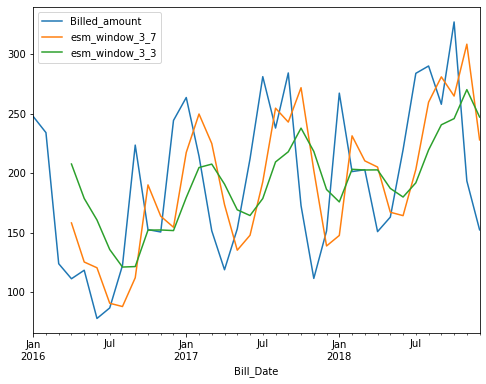

<IPython.core.display.Javascript object>

In [31]:
# alpha 3 didn't do well in capturing the variations but it has smoothened the curve better.

bill_2018[["Billed_amount", "esm_window_3_7", "esm_window_3_3"]].plot()

# Error Function - RMSE

# 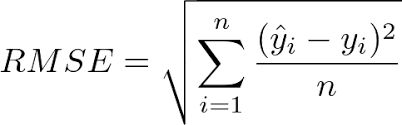

In [32]:
(((bill_2018["Billed_amount"] - bill_2018["ma_rolling_3"]) ** 2).mean()) ** 0.5

70.98561687433802

<IPython.core.display.Javascript object>

In [33]:
(((bill_2018["Billed_amount"] - bill_2018["wma_rolling_3"]) ** 2).mean()) ** 0.5

65.82572602256133

<IPython.core.display.Javascript object>

In [34]:
(((bill_2018["Billed_amount"] - bill_2018["ewm_window_3"]) ** 2).mean()) ** 0.5

31.710834656453756

<IPython.core.display.Javascript object>

In [35]:
(((bill_2018["Billed_amount"] - bill_2018["esm_window_3_7"]) ** 2).mean()) ** 0.5

61.26408398853503

<IPython.core.display.Javascript object>

In [36]:
(((bill_2018["Billed_amount"] - bill_2018["esm_window_3_3"]) ** 2).mean()) ** 0.5

65.22424423118377

<IPython.core.display.Javascript object>

* We can see that Exponential Moving Average and Smoothing Moving Average with alpha 0.7 performed comparatively better.
* All these techniques are more for understanding purposes but usually advanced models like ARIMA, FB Prophet, LSTM perform better on time series data.